In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models,optimizers

In [4]:
df = pd.read_csv('../../Datasets/Horse_Survibality/horse.csv')

In [5]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [6]:
df.describe(include='O')

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
count,299,299,243,230,252,267,244,255,243,195,193,197,181,134,299,299,299
unique,2,2,4,4,6,3,5,4,4,3,3,4,5,3,3,2,2
top,yes,adult,cool,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,cloudy,lived,yes,no
freq,180,275,108,114,79,187,67,127,75,101,119,79,78,47,178,190,200


In [7]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [8]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [9]:
df.drop(columns=df.columns[df.isnull().sum()>100],inplace=True,axis=1)

In [10]:
df.isnull().sum()

surgery                   0
age                       0
hospital_number           0
rectal_temp              60
pulse                    24
respiratory_rate         58
temp_of_extremities      56
peripheral_pulse         69
mucous_membrane          47
capillary_refill_time    32
pain                     55
peristalsis              44
abdominal_distention     56
packed_cell_volume       29
total_protein            33
outcome                   0
surgical_lesion           0
lesion_1                  0
lesion_2                  0
lesion_3                  0
cp_data                   0
dtype: int64

In [11]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
packed_cell_volume       float64
total_protein            float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [12]:
for column in df.select_dtypes('object'):
  df[column].fillna(df[column].mode(),inplace=True)

In [13]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
packed_cell_volume       float64
total_protein            float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [14]:
df.isnull().sum()

surgery                   0
age                       0
hospital_number           0
rectal_temp              60
pulse                    24
respiratory_rate         58
temp_of_extremities      56
peripheral_pulse         69
mucous_membrane          46
capillary_refill_time    32
pain                     55
peristalsis              44
abdominal_distention     56
packed_cell_volume       29
total_protein            33
outcome                   0
surgical_lesion           0
lesion_1                  0
lesion_2                  0
lesion_3                  0
cp_data                   0
dtype: int64

In [15]:
for column in df.select_dtypes('float64'):
  df[column].fillna(df[column].mean(),inplace=True)

In [16]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
packed_cell_volume       float64
total_protein            float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [17]:
df.isnull().sum()

surgery                   0
age                       0
hospital_number           0
rectal_temp               0
pulse                     0
respiratory_rate          0
temp_of_extremities      56
peripheral_pulse         69
mucous_membrane          46
capillary_refill_time    32
pain                     55
peristalsis              44
abdominal_distention     56
packed_cell_volume        0
total_protein             0
outcome                   0
surgical_lesion           0
lesion_1                  0
lesion_2                  0
lesion_3                  0
cp_data                   0
dtype: int64

In [18]:
df.shape

(299, 21)

In [19]:
df.drop(columns=['hospital_number'],axis=1,inplace = True)

In [20]:
df.dtypes

surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
packed_cell_volume       float64
total_protein            float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [21]:
df.describe(include='O')

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome,surgical_lesion,cp_data
count,299,299,243,230,253,267,244,255,243,299,299,299
unique,2,2,4,4,6,3,5,4,4,3,2,2
top,yes,adult,cool,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,lived,yes,no
freq,180,275,108,114,80,187,67,127,75,178,190,200


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes('object'):
  df[column] = le.fit_transform(df[column])

In [23]:
df.dtypes

surgery                    int32
age                        int32
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities        int32
peripheral_pulse           int32
mucous_membrane            int32
capillary_refill_time      int32
pain                       int32
peristalsis                int32
abdominal_distention       int32
packed_cell_volume       float64
total_protein            float64
outcome                    int32
surgical_lesion            int32
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                    int32
dtype: object

In [24]:
df.describe()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.602007,0.080268,38.168619,72.000000,30.460581,1.93311,2.735786,3.444816,1.468227,2.578595,1.729097,1.906355,46.307407,24.274436,1.337793,0.635452,3659.709030,90.528428,7.387960,0.331104
std,0.490305,0.272162,0.655730,27.468469,15.853977,1.25407,0.923458,1.844491,0.691386,1.663770,1.296688,1.444009,9.915919,25.804620,0.860940,0.482110,5408.472421,650.637139,127.749768,0.471399
min,0.000000,0.000000,35.400000,30.000000,8.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,37.900000,48.500000,20.000000,1.00000,2.000000,2.500000,1.000000,1.000000,1.000000,1.000000,39.000000,6.600000,0.000000,0.000000,2111.500000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,38.168619,68.000000,30.000000,2.00000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,46.000000,7.700000,2.000000,1.000000,2322.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,38.500000,88.000000,34.500000,3.00000,3.000000,5.000000,2.000000,4.000000,2.000000,3.000000,50.000000,52.000000,2.000000,1.000000,3209.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,40.800000,184.000000,96.000000,4.00000,4.000000,6.000000,3.000000,5.000000,4.000000,4.000000,75.000000,89.000000,2.000000,1.000000,41110.000000,7111.000000,2209.000000,1.000000


In [25]:
y = df.iloc[:,[14]]

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std = StandardScaler()
X_transformed = std.fit_transform(df)

In [27]:
minmax = MinMaxScaler()
y_transformed = minmax.fit_transform(y)



In [30]:
X_transformed.shape

(299, 20)

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_transformed,y_transformed,train_size = 0.8,random_state=42)

In [32]:
X_train

array([[ 0.81308739, -0.29541958, -0.41033583, ..., -0.13937138,
        -0.05792844, -0.70356236],
       [-1.22988009, -0.29541958,  0.04793643, ..., -0.13937138,
        -0.05792844, -0.70356236],
       [ 0.81308739, -0.29541958,  1.72826803, ..., -0.13937138,
        -0.05792844, -0.70356236],
       ...,
       [ 0.81308739, -0.29541958,  0.20069385, ..., -0.13937138,
        -0.05792844,  1.42133811],
       [ 0.81308739, -0.29541958, -0.71585066, ..., -0.13937138,
        -0.05792844, -0.70356236],
       [-1.22988009, -0.29541958,  0.20069385, ..., -0.13937138,
        -0.05792844, -0.70356236]])

In [33]:
model = models.Sequential()

model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [34]:
model_performance = model.fit(X_train,y_train,epochs=200,validation_split=0.2,verbose=0)

In [35]:
model_performance.history.keys()
print(model_performance.history['accuracy'][-1])

0.8272251486778259


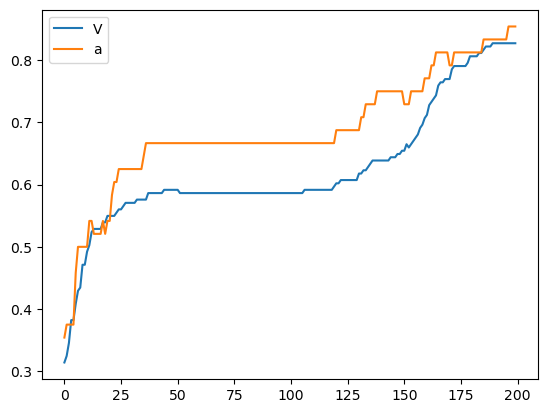

In [36]:
plt.plot(model_performance.history['accuracy'])
plt.plot(model_performance.history['val_accuracy'])
plt.legend('Accuracy')
plt.legend('Val_accuracy')
plt.show()

In [37]:
test_loss,test_acc = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7667
